In [1]:
# *********************************************************************************
# 
# Project to course Neural networks in applications
# 
# Author: Bistakova Lenka, Brnovik Diana
# PEF MENDELU 2020
# 
# Used dataset: Student Alcohol Consumption - Portuguese language course dataset
# URL of dataset: https://data.world/data-society/student-alcohol-consumption
# 
# *********************************************************************************

In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import neurolab as nl
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from scipy import stats

In [3]:
def convert(list): 
    r = []
    for l in list:
        c = np.array(l)
        if (c==[0,0]).all():
            r.append(1)
        elif (c==[0,1]).all():
            r.append(2)
        elif (c==[1,0]).all():
            r.append(3)
        elif (c==[1,1]).all():
            r.append(4)
        else:
            r.append(5)
    return r 

In [4]:
### Load data

data = pd.DataFrame(pd.read_csv('../data/alcohol2.csv'))
X = (data).to_numpy()[:,:16]
Y = (data).to_numpy()[:,16]

In [5]:
### Target transform

# class 1--4 --> alcohol consumption (1=low, 4=high)
val_map = {1: [0,0], 2: [0,1], 3: [1,0], 4: [1,1]}
T = np.array([val_map[y] for y in Y])
data['alcohol_consumption'] = data['alcohol_consumption'].map( {1: [0,0], 2: [0,1], 3: [1,0], 4: [1,1]})

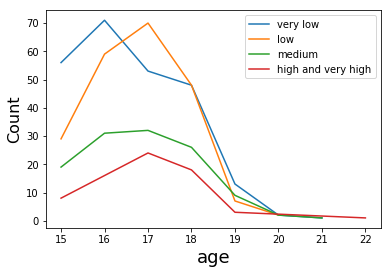

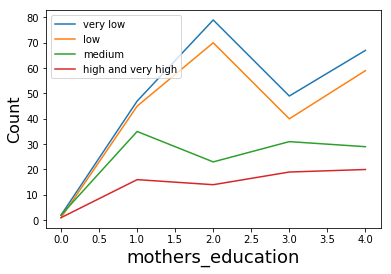

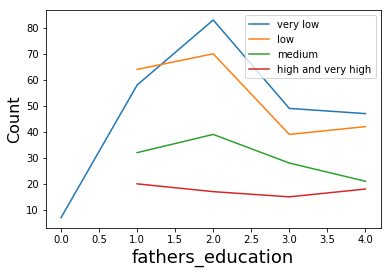

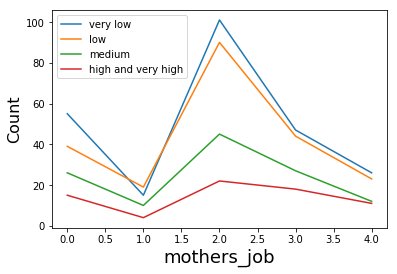

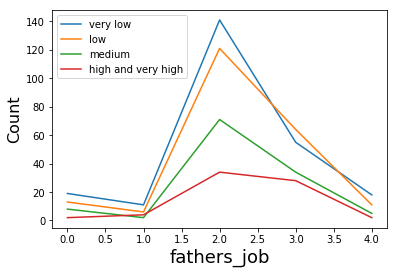

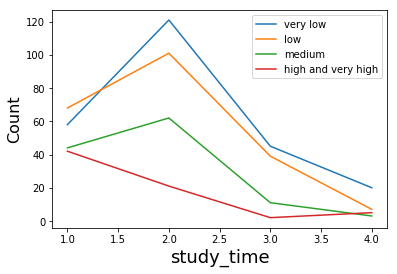

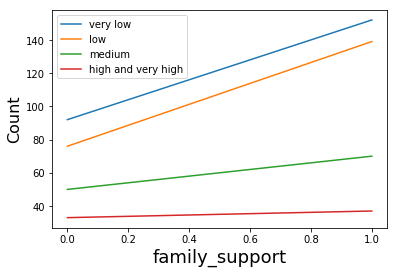

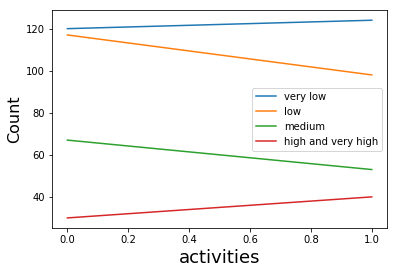

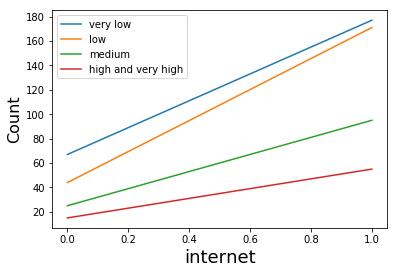

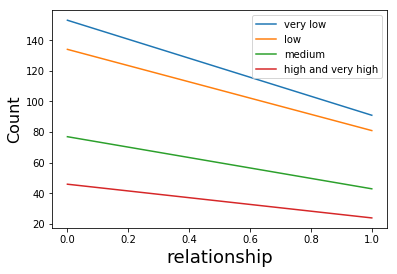

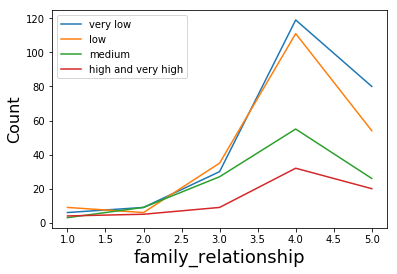

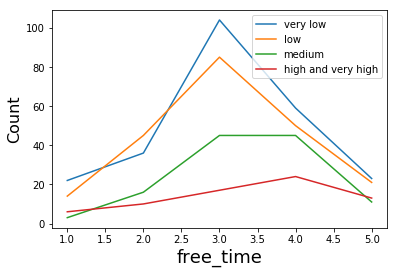

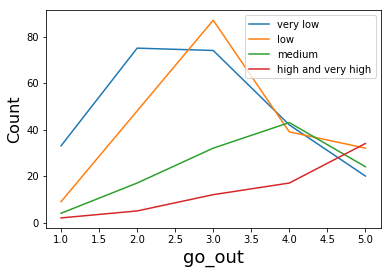

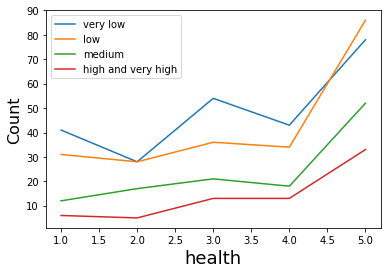

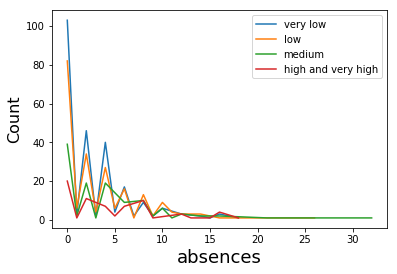

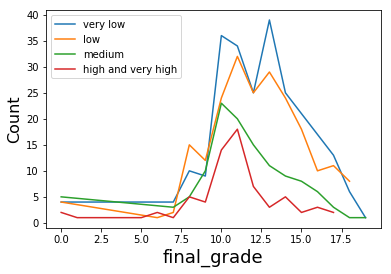

In [6]:
### Visualization of input data in curves

for column in data:
    feature = data[column]
    if column != 'alcohol_consumption':
        x_axis = []
        y_axis = []
        for i in range(1,5):
            indices = np.where(Y == i)
            feature_filtrated = np.array(feature)[indices]
            unique, counts = np.unique(feature_filtrated, return_counts=True)
            y_axis.append(counts)
            x_axis.append(unique)
        np_y_axis = np.array(y_axis)
        np_x_axis = np.array(x_axis)
        labels = ['very low','low','medium','high and very high']
        plt.plot(np_x_axis[0],np_y_axis[0],label=labels[0])
        plt.plot(np_x_axis[1],np_y_axis[1],label=labels[1])
        plt.plot(np_x_axis[2],np_y_axis[2],label=labels[2])
        plt.plot(np_x_axis[3],np_y_axis[3],label=labels[3])
        plt.legend()
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Count', fontsize=16)
        plt.show()

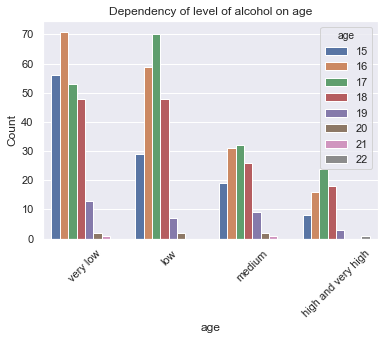

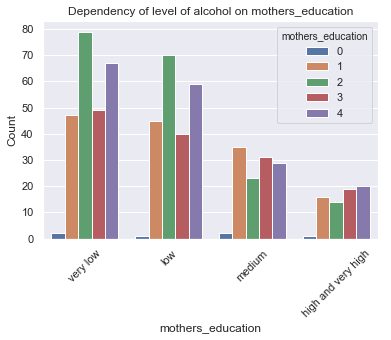

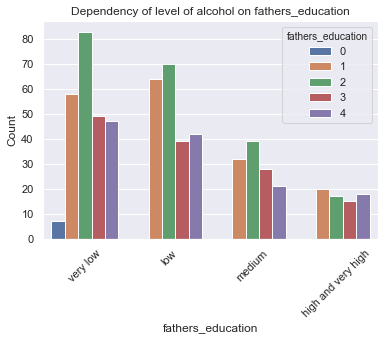

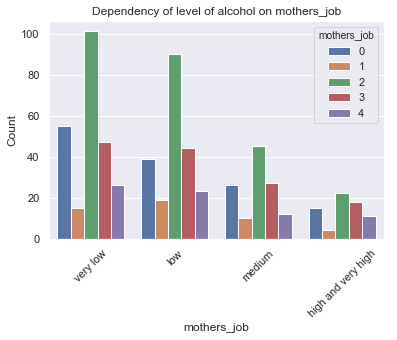

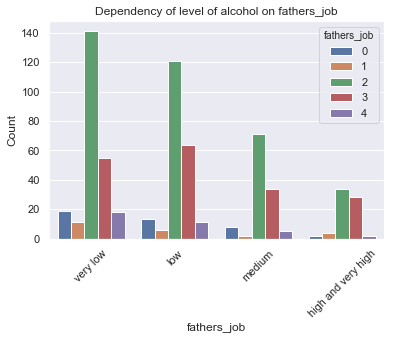

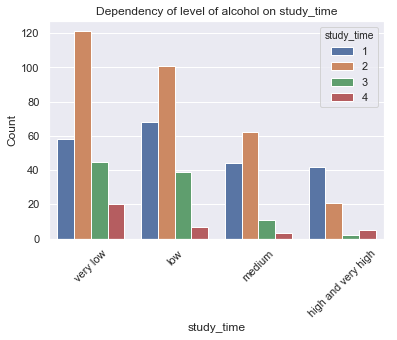

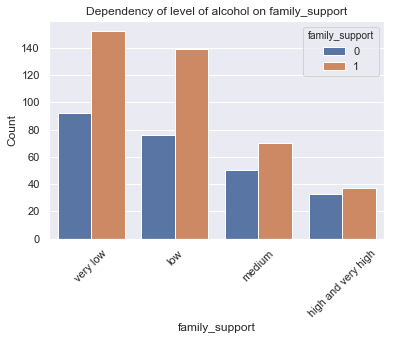

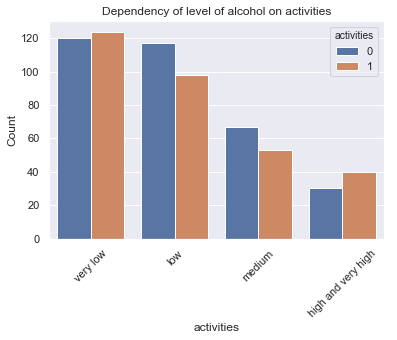

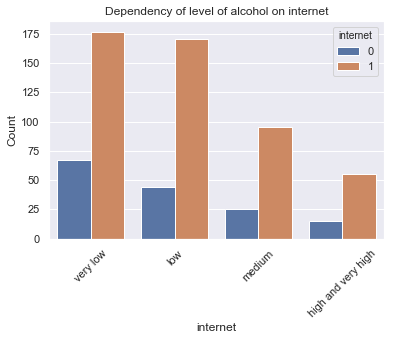

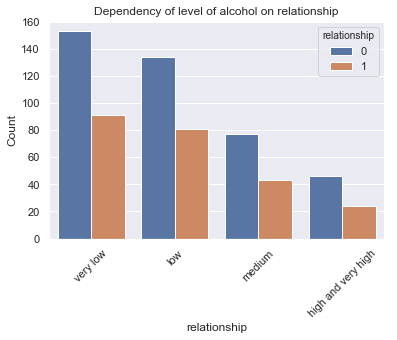

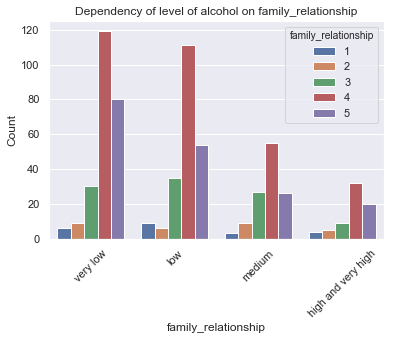

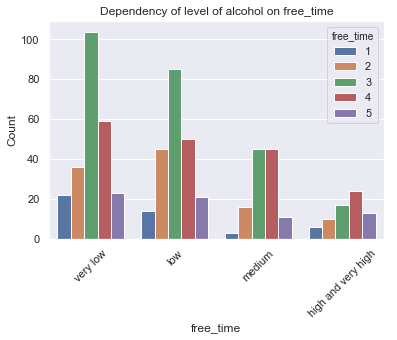

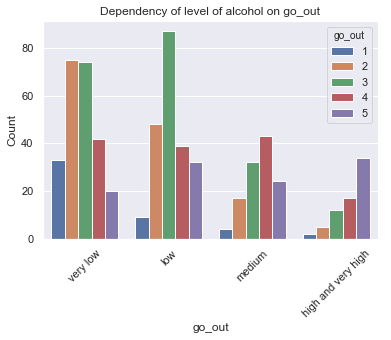

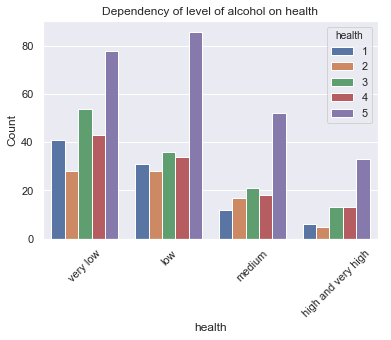

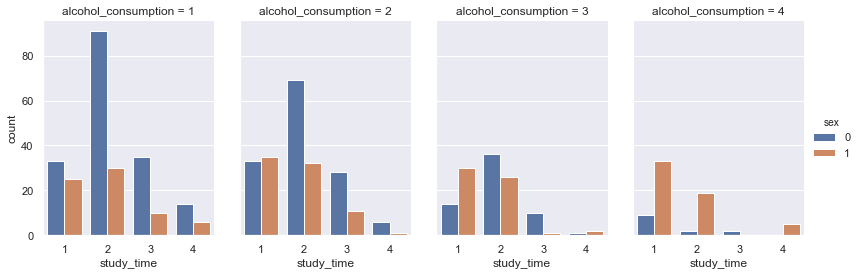

In [7]:
### Visualization of input data in histograms

dataVisualize = pd.DataFrame(pd.read_csv('../data/alcohol.csv'))

sns.set(style="darkgrid")
labels = ['very low','low','medium','high and very high']
for i in data:
    if i != 'alcohol_consumption' and i != 'absences' and i != 'final_grade':
        plt.figure(i)
        fig = sns.countplot(x="alcohol_consumption", hue=i, data=dataVisualize)
        fig.set(xlabel=i, ylabel='Count')
        plt.title("Dependency of level of alcohol on {}".format(i))
        fig.set_xticklabels(labels, rotation=45)
        plt.show
        
# different view with multiple attributes
g = sns.catplot(x="study_time", hue="sex", col="alcohol_consumption",
                data=dataVisualize, kind="count",
                height=4, aspect=.7);

In [8]:
### Pre-process data using MinMaxScaler() [0,1]

min_max_scaler = preprocessing.MinMaxScaler()
X_process = min_max_scaler.fit_transform(X)

/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
### Constants

train_and_valid = 0.90 # CAN BE CHANGED
valid_fix = 0.20 # DO NOT CHANGE !!!
train_calc = train_and_valid * (1 - valid_fix)
valid_calc = train_and_valid - train_calc
test_calc = 1 - train_calc - valid_calc

train_fraction=train_calc
validation_fraction=valid_calc
test_fraction=test_calc

hidden_layer_neurons = 8
output_layer_neurons = 2

epochs = 10
learning_rate = 0.001
alpha=0.001
goal = 1e-5
tolerance=0.0001
max_iterations=10000
k_cross_validation = 5

#X_train = 64% of features
#X_validation = 16% of features
#X_test = 20% of features

#T_train = 64 % of targets
#T_validation = 16% of targets
#T_test = 20% of targets

#X2_train = 80% of features
#X2_test = 20% of features

#T2_train = 80% of targets
#T2_test = 20% of targets

split_sizes = [int(len(X_process)*train_fraction), int(len(X_process)*(train_fraction+validation_fraction))]
X_train,X_validation,X_test = np.split(X_process, split_sizes)
T_train,T_validation,T_test = np.split(T, split_sizes)
X2_train, X2_test, T2_train, T2_test = train_test_split(
    X_process, T, 
    train_size=train_fraction+validation_fraction, 
    test_size=test_fraction
)


Repetitions count: 1
Epoch: 10; Error: 147.260060154;
The maximum number of train epochs is reached


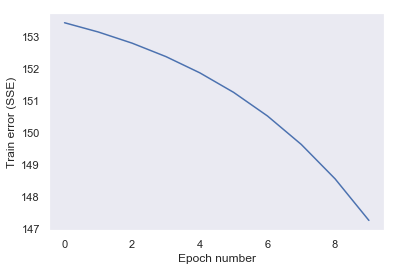

Validation success: 53.41880341880342 %
Validation error: 46.58119658119658 %
Number of layers: 2
Learning rate: 0.001
Weights of 0 layer: [[-0.01081872  0.0110005  -0.38166236  0.90703789 -0.00904242 -0.47398253
  -0.76137065 -0.57275748  0.43919485 -1.27322969 -0.89555768  0.73324848
   1.10792441  0.97926132  1.06495923 -1.26555364]
 [ 0.61972212 -0.38240108  0.02156807 -1.2985968   0.40875196 -1.27245186
   0.59558344 -0.93145231 -0.202117    0.84431955  1.26023862  0.69879654
   0.44207572 -0.48218714 -1.24715128 -0.32582126]
 [-0.16920598  1.15500213 -0.73770893  0.61351417 -0.74878509  0.19021854
  -0.8740744  -0.46755714  0.60771676  0.55945383 -0.66990942  1.11669925
   0.92971623  1.09085275 -1.32144187 -0.27832525]
 [-0.26434408  0.06936011 -0.22095388 -0.85053241  1.13052252 -1.49932263
  -1.36584563 -0.95858654 -0.08836505 -0.1860371  -1.46934091 -0.16539943
   0.85482413  0.40521211  0.21922327  0.09847352]
 [ 0.58200584 -0.57626316 -0.42906048  1.20376882 -0.7749653   0.

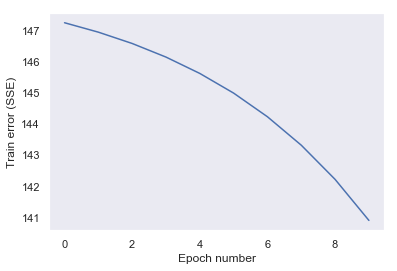

Validation success: 53.41880341880342 %
Validation error: 46.58119658119658 %
Number of layers: 2
Learning rate: 0.001
Weights of 0 layer: [[-3.16176241e-02 -9.79840485e-03 -4.02461261e-01  8.86238990e-01
  -2.98413240e-02 -4.94781428e-01 -7.82169555e-01 -5.93556385e-01
   4.18395953e-01 -1.29402860e+00 -9.16356577e-01  7.12449583e-01
   1.08712551e+00  9.58462418e-01  1.04416033e+00 -1.28635254e+00]
 [ 5.98923223e-01 -4.03199984e-01  7.69164485e-04 -1.31939570e+00
   3.87953061e-01 -1.29325076e+00  5.74784541e-01 -9.52251210e-01
  -2.22915898e-01  8.23520645e-01  1.23943972e+00  6.77997637e-01
   4.62874619e-01 -5.02986040e-01 -1.22635237e+00 -3.46620163e-01]
 [-1.90004878e-01  1.13420323e+00 -7.58507833e-01  5.92715265e-01
  -7.69583995e-01  1.69419643e-01 -8.94873305e-01 -4.88356041e-01
   5.86917859e-01  5.38654926e-01 -6.90708324e-01  1.09590035e+00
   9.08917328e-01  1.07005385e+00 -1.34224077e+00 -2.99124156e-01]
 [-2.85142981e-01  4.85612101e-02 -2.41752781e-01 -8.71331313e-01


In [10]:
### Train & Validate (Neurolab feed-forward backpropagation network with custom validation implementation)

# Create a neural network (Multilayer feed forward perceptron)
net = nl.net.newff(nl.tool.minmax(X_process),[hidden_layer_neurons,output_layer_neurons])

# Change the transfer function for the output layer
net.layers[0].transf = nl.trans.LogSig() # hidden layer
net.layers[1].transf = nl.trans.LogSig() # output layer

# Train the network & Simulate validation
i = 1
i_max = max_iterations
previous_accuracy = 0
can_try_again = True
while i <= i_max:
    print"\nRepetitions count:", i
    error = net.trainf = nl.train.train_rprop(net, X_train, T_train, epochs=epochs, show=10, lr=learning_rate, goal=0)
    
    plt.plot(error)
    plt.xlabel('Epoch number')
    plt.ylabel('Train error (SSE)')
    plt.grid()
    plt.show()
    
    out_validation = net.sim(X_validation)
    out_validation = np.around(out_validation)
    
    accuracy = np.mean(out_validation == T_validation)
    error_accuracy = 1 - accuracy
    
    print"Validation success:", accuracy*100, "%"
    print"Validation error:", error_accuracy*100, "%"
    print"Number of layers:", len(net.layers)
    print"Learning rate:", learning_rate
    
    for n in range(0,len(net.layers)):
        print"Weights of", n, "layer:", net.layers[n].np['w']
        print"Biases of", n, "layer:", net.layers[n].np['b']
    
    if (accuracy-previous_accuracy <= tolerance) or (i >= i_max):
        if (can_try_again):
            previous_accuracy = accuracy
            i+=1 #training continues
            can_try_again = False
        i=i_max+1 #training stops
    else:
        previous_accuracy = accuracy
        i+=1 #training continues
        can_try_again = True


In [11]:
### Predict (Neurolab feed-forward backpropagation network with custom validation implementation)

out_test = net.sim(X_test)
out_test = np.around(out_test)
accuracy = np.mean(out_test == T_test)
print"Success:", round(accuracy * 100, 2), "%"

Success: 63.85 %


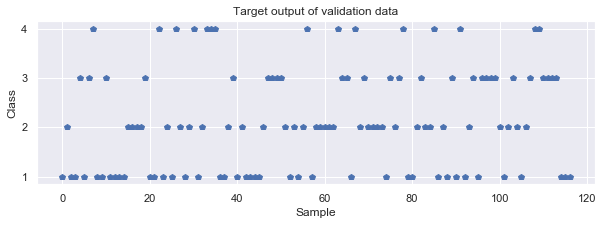

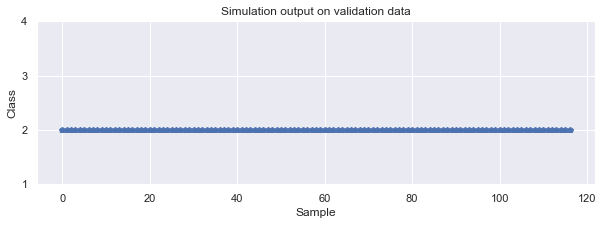

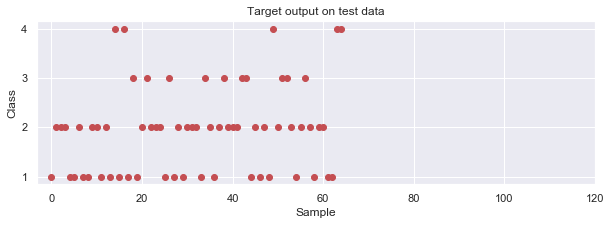

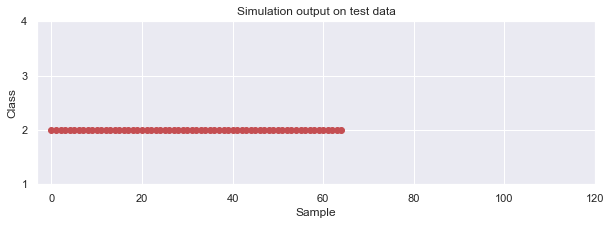

In [12]:
### Compare the results with target data (Neurolab feed-forward backpropagation network with custom validation implementation)

T_val_converted = convert(T_validation)
T_test_converted = convert(T_test)
out_val_converted = convert(out_validation)
out_test_converted = convert(out_test)

plt.figure(figsize=(10,3))
plt.plot(T_val_converted,'p')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output of validation data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(out_val_converted,'p')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on validation data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(T_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(out_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

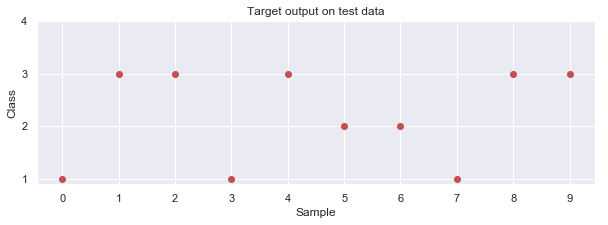

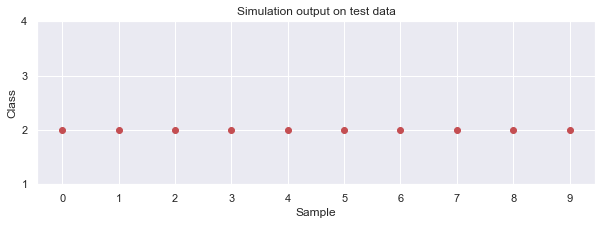

In [13]:
### Compare 10 random patterns (Neurolab feed-forward backpropagation network with custom validation implementation)

T_test_converted = convert(T_test)
out_test_converted = convert(out_test)
length = 10
chosen_out_test = []
chosen_T_test = []
rand_numbers = np.sort(np.random.randint(len(T_test_converted), size=(length)))
for i in rand_numbers:
    chosen_out_test.append(out_test_converted[i])
    chosen_T_test.append(T_test_converted[i])

plt.figure(figsize=(10,3))
plt.plot(chosen_T_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(chosen_out_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

Training scores: [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.035      -0.4        -0.4        -0.06       -0.045     ]
 [-0.3125     -0.375      -0.385      -0.385      -0.3825    ]
 [-0.36125    -0.32125    -0.37375    -0.3675     -0.35125   ]
 [-0.32441113 -0.31691649 -0.32012848 -0.32655246 -0.3254818 ]]
Validation scores: [[-0.60683761 -0.33760684 -0.35042735 -0.37179487 -0.37931034]
 [-0.4017094  -0.33760684 -0.35042735 -0.39316239 -0.45258621]
 [-0.3974359  -0.33760684 -0.35042735 -0.37179487 -0.43534483]
 [-0.39316239 -0.35042735 -0.35042735 -0.37179487 -0.37931034]
 [-0.36324786 -0.34615385 -0.36324786 -0.35042735 -0.34482759]]
Mean training scores 1     -0.000000
100    0.188000
200    0.368000
400    0.355000
467    0.322698
dtype: float64
Mean validation scores 1      0.409195
100    0.387098
200    0.378522
400    0.369024
467    0.353581
dtype: float64


(0, 0.5)

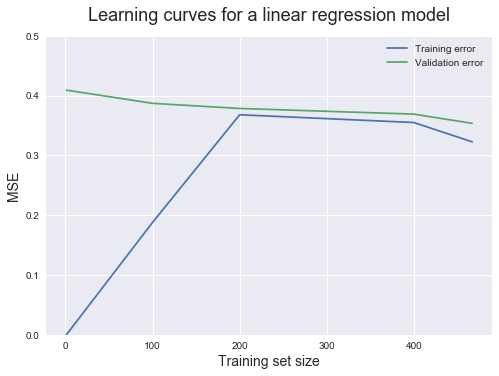

In [14]:
### Train & Validate (Scikit-learn MLPClassifier)

mlp = MLPClassifier(
    activation='logistic', 
    alpha=alpha, 
    batch_size='auto', 
    early_stopping=False, 
    hidden_layer_sizes=(hidden_layer_neurons), 
    learning_rate='constant',
    learning_rate_init=learning_rate, 
    max_iter=max_iterations,
    shuffle=True,
    solver='adam',
    tol=tolerance,
    validation_fraction=validation_fraction,
    verbose=False
)

# 519 je 80% 649, počet prvkov predanych v parametre Y a 
# y sa rovna a z neho použije 80% ako training a 
# 20% ako validation a tých 80% je maximalna posledna hodnota čo môže byť v training_size

train_sizes = [1,100,200,400,467] #649*0,90*0,80=467
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = mlp,
    X = X2_train,
    y = T2_train, 
    train_sizes = train_sizes, 
    cv = k_cross_validation,
    scoring = 'neg_mean_squared_error'
)

print'Training scores:', train_scores
print'Validation scores:', validation_scores

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print'Mean training scores', pd.Series(train_scores_mean, index = train_sizes)
print'Mean validation scores',pd.Series(validation_scores_mean, index = train_sizes)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.5)

In [16]:
### Train & Predict (Scikit-learn MLPClassifier)

mlp.fit(X_train,T_train)
out_test = mlp.predict(X_test)
scores = mlp.score(X_test, T_test)

print(confusion_matrix(convert(T_test),convert(out_test)))
print(classification_report(T_test,out_test))
print"Success:", round(scores * 100, 2), "%"

[[17  3  0  2]
 [21  3  0  4]
 [ 4  5  0  1]
 [ 3  1  0  1]]
              precision    recall  f1-score   support

           0       0.25      0.13      0.17        15
           1       0.45      0.27      0.34        33

   micro avg       0.39      0.23      0.29        48
   macro avg       0.35      0.20      0.26        48
weighted avg       0.39      0.23      0.29        48
 samples avg       0.12      0.15      0.12        48

Success: 32.31 %


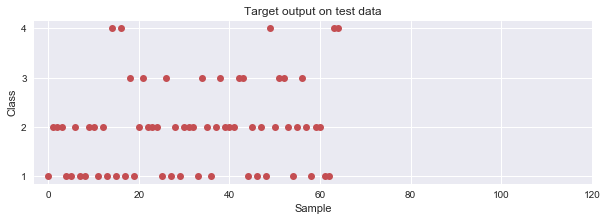

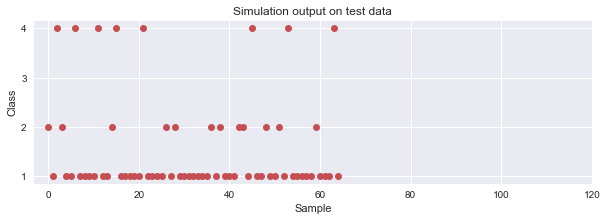

In [17]:
### Compare the results with target data (Scikit-learn MLPClassifier)

T_test_converted = convert(T_test)
out_test_converted = convert(out_test)

plt.figure(figsize=(10,3))
plt.plot(T_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(out_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

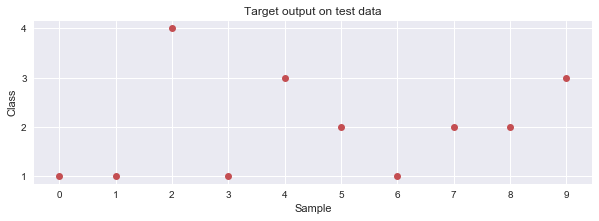

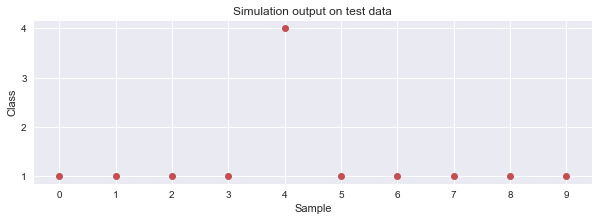

In [18]:
### Compare 10 random patterns (Scikit-learn MLPClassifier)

T_test_converted = convert(T_test)
out_test_converted = convert(out_test)
length = 10
chosen_out_test = []
chosen_T_test = []
rand_numbers = np.sort(np.random.randint(len(T_test_converted), size=(length)))
for i in rand_numbers:
    chosen_out_test.append(out_test_converted[i])
    chosen_T_test.append(T_test_converted[i])

plt.figure(figsize=(10,3))
plt.plot(chosen_T_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(chosen_out_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

Training scores: [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.16405677 -0.18746069 -0.18746069 -0.18746069 -0.18746069]
 [-0.1872563  -0.2042971  -0.19969535 -0.19969535 -0.19969535]
 [-0.19528866 -0.202963   -0.19692584 -0.20262136 -0.20091745]
 [-0.19648092 -0.20323321 -0.19811136 -0.20320567 -0.20039829]]
Validation scores: [[-0.60683761 -0.33760684 -0.35042735 -0.37179487 -0.37931034]
 [-0.26377337 -0.24370693 -0.25625917 -0.276976   -0.27058837]
 [-0.23743059 -0.20962971 -0.23021558 -0.21972839 -0.2251818 ]
 [-0.22743145 -0.20155304 -0.22165997 -0.20787696 -0.21164142]
 [-0.22780929 -0.20104602 -0.22068111 -0.20534084 -0.21124866]]
Mean training scores 1     -0.000000
100    0.182780
200    0.198128
400    0.199743
467    0.200286
dtype: float64
Mean validation scores 1      0.409195
100    0.262261
200    0.224437
400    0.214033
467    0.213225
dtype: float64


(0, 0.5)

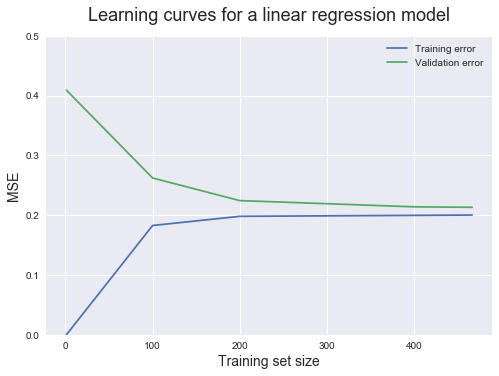

In [19]:
### Train & Validate (Scikit-learn LinearRegression)

mlp = LinearRegression()

# 519 je 80% 649, počet prvkov predanych v parametre Y a 
# y sa rovna a z neho použije 80% ako training a 
# 20% ako validation a tých 80% je maximalna posledna hodnota čo môže byť v training_size

train_sizes = [1,100,200,400,467] #649*0,90*0,80=467
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = mlp,
    X = X2_train,
    y = T2_train, 
    train_sizes = train_sizes, 
    cv = k_cross_validation,
    scoring = 'neg_mean_squared_error'
)

print'Training scores:', train_scores
print'Validation scores:', validation_scores

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print'Mean training scores', pd.Series(train_scores_mean, index = train_sizes)
print'Mean validation scores',pd.Series(validation_scores_mean, index = train_sizes)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.5)

In [20]:
### Train & Predict (Scikit-learn LinearRegression)

mlp.fit(X_train,T_train)
out_test = mlp.predict(X_test)
scores = mlp.score(X_test, T_test)

out_test = np.around(out_test)
accuracy = np.mean(out_test == T_test)

print(confusion_matrix(convert(T_test),convert(out_test)))
print(classification_report(T_test,out_test))

[[15  6  0  1]
 [18  4  2  4]
 [ 4  4  1  1]
 [ 3  1  0  1]]
              precision    recall  f1-score   support

           0       0.30      0.20      0.24        15
           1       0.45      0.30      0.36        33

   micro avg       0.41      0.27      0.33        48
   macro avg       0.38      0.25      0.30        48
weighted avg       0.41      0.27      0.33        48
 samples avg       0.15      0.18      0.15        48



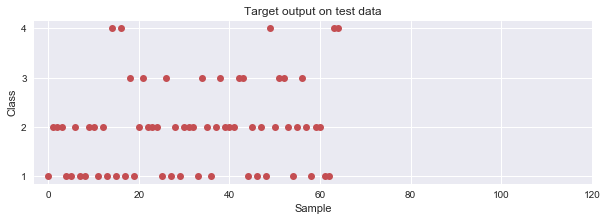

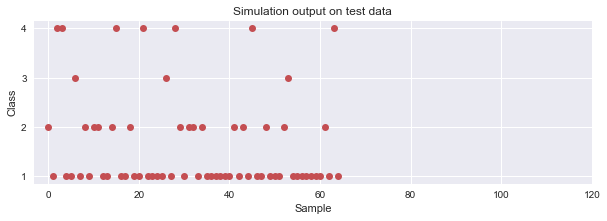

In [21]:
### Compare the results with target data (Scikit-learn LinearRegression)

T_test_converted = convert(T_test)
out_test_converted = convert(out_test)

plt.figure(figsize=(10,3))
plt.plot(T_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(out_test_converted,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 130, 20)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

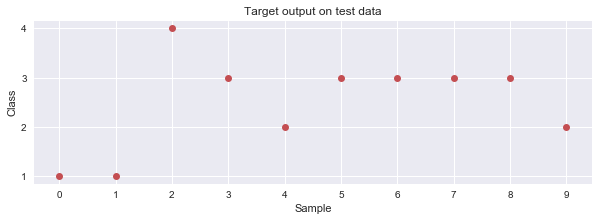

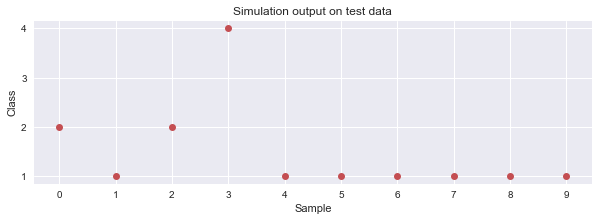

In [22]:
### Compare 10 random patterns (Scikit-learn LinearRegression)

T_test_converted = convert(T_test)
out_test_converted = convert(out_test)
length = 10
chosen_out_test = []
chosen_T_test = []
rand_numbers = np.sort(np.random.randint(len(T_test_converted), size=(length)))
for i in rand_numbers:
    chosen_out_test.append(out_test_converted[i])
    chosen_T_test.append(T_test_converted[i])

plt.figure(figsize=(10,3))
plt.plot(chosen_T_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Target output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(chosen_out_test,'ro')
plt.ylabel('Class')
plt.xlabel('Sample')
plt.title('Simulation output on test data')
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(1, 5, 1))
plt.grid(True)
plt.show()

In [23]:
### Error analysis - decision on which attributes to remove depending on mode of features
# if mode > 70% remove from dataset, otherwise it can remain

indices = []
for index in range(len(T_validation)):
        equal = np.array_equal(T_validation[index], out_validation[index])
        if not equal:
            indices.append(index)
            
notEqualdata = []
j = 0
for i in indices:
    notEqualdata.append(X_validation[i,:])
    j += 1
    
equaldataLength = len(notEqualdata)

notEqualdata = np.array(pd.DataFrame(notEqualdata))
invertedTable = min_max_scaler.inverse_transform(notEqualdata)

mode = []
modeCount = []
for i in range(16):
    column = invertedTable[:,i]
    mode.append(stats.mode(column))
    modeCount.append(stats.mode(column).count)

modeCount = np.array(modeCount).ravel()
modeCount = modeCount.astype(float)

modeTable = pd.DataFrame(mode)
modeTable = modeTable.astype(float)

relativeCount = [x / equaldataLength for x in modeCount]
modeTable = modeTable.assign(percentage = relativeCount)

removebooleans = [ x > 0.70 for x in relativeCount]
modeTable = modeTable.assign(remove = removebooleans)
print(modeTable)

    mode  count  percentage  remove
0   16.0   32.0    0.390244   False
1    1.0   29.0    0.353659   False
2    2.0   29.0    0.353659   False
3    2.0   41.0    0.500000   False
4    2.0   42.0    0.512195   False
5    1.0   38.0    0.463415   False
6    1.0   49.0    0.597561   False
7    0.0   41.0    0.500000   False
8    1.0   50.0    0.609756   False
9    0.0   45.0    0.548780   False
10   4.0   35.0    0.426829   False
11   3.0   27.0    0.329268   False
12   3.0   25.0    0.304878   False
13   5.0   31.0    0.378049   False
14   0.0   33.0    0.402439   False
15  10.0   25.0    0.304878   False


In [24]:
### Error analysis - decision on which attributes to remove depending on mode of features
# if mode > 70% remove from dataset, otherwise it can remain

indices = []
for index in range(len(T_test)):
        equal = np.array_equal(T_test[index], out_test[index])
        if not equal:
            indices.append(index)
            
notEqualdata = []
j = 0
for i in indices:
    notEqualdata.append(X_test[i,:])
    j += 1
    
equaldataLength = len(notEqualdata)

notEqualdata = np.array(pd.DataFrame(notEqualdata))
invertedTable = min_max_scaler.inverse_transform(notEqualdata)

mode = []
modeCount = []
for i in range(16):
    column = invertedTable[:,i]
    mode.append(stats.mode(column))
    modeCount.append(stats.mode(column).count)

modeCount = np.array(modeCount).ravel()
modeCount = modeCount.astype(float)

modeTable = pd.DataFrame(mode)
modeTable = modeTable.astype(float)

relativeCount = [x / equaldataLength for x in modeCount]
modeTable = modeTable.assign(percentage = relativeCount)

removebooleans = [ x > 0.70 for x in relativeCount]
modeTable = modeTable.assign(remove = removebooleans)
print(modeTable)

    mode  count  percentage  remove
0   18.0   26.0    0.590909   False
1    1.0   16.0    0.363636   False
2    1.0   14.0    0.318182   False
3    0.0   13.0    0.295455   False
4    2.0   20.0    0.454545   False
5    2.0   22.0    0.500000   False
6    0.0   23.0    0.522727   False
7    0.0   28.0    0.636364   False
8    1.0   30.0    0.681818   False
9    0.0   26.0    0.590909   False
10   4.0   24.0    0.545455   False
11   3.0   14.0    0.318182   False
12   3.0   19.0    0.431818   False
13   5.0   15.0    0.340909   False
14   0.0   19.0    0.431818   False
15   0.0    6.0    0.136364   False
